In [5]:
import numpy as np
import matplotlib.pyplot as plt
from src.parameter_handler import RustMonteCarloData, perform_rust_computation

## Perform Monte-Carlo calculation:

In [4]:
lengths              = [8, 16, 32, 64, 128]
thermalisation_steps = dict()
measurement_steps    = dict()

for L in lengths:
    if L <= 64:
        thermalisation_steps[L] = np.uint(5e5)
        measurement_steps[L]    = np.uint(5e5)
    else:
        thermalisation_steps[L] = np.uint(1e5)
        measurement_steps[L]    = np.uint(1e5)

In [ ]:
for L in lengths:
    (Lx, Ly)     = (L, L)
    therm_step   = thermalisation_steps[L]
    measure_step = measurement_steps[L]
    perform_rust_computation(f"cargo run --release  -- {Lx} {Ly} {therm_step} {measure_step} ")

Save the measurements:

In [6]:
results: dict[int, RustMonteCarloData] = dict()

for L in lengths:
    results[L] = RustMonteCarloData(f"results/montecarlo_parallel_{L}x{L}_temp.txt")
    print(f"elapsed time for size {L}x{L}: {results[L].elapsed_time/60:.3}min ({results[L].elapsed_time}s)")

for res1 in results.values():
    for res2 in results.values():
        if res1 is not res2:
            same_temperatures = np.all(res1.temperatures == res2.temperatures)
            assert(same_temperatures)

temps = results[lengths[0]].temperatures

elapsed time for size 8x8: 0.783min (47.0s)
elapsed time for size 16x16: 3.7min (222.0s)
elapsed time for size 32x32: 16.2min (971.0s)
elapsed time for size 64x64: 62.8min (3768.0s)
elapsed time for size 128x128: 43.3min (2599.0s)


### Plot!

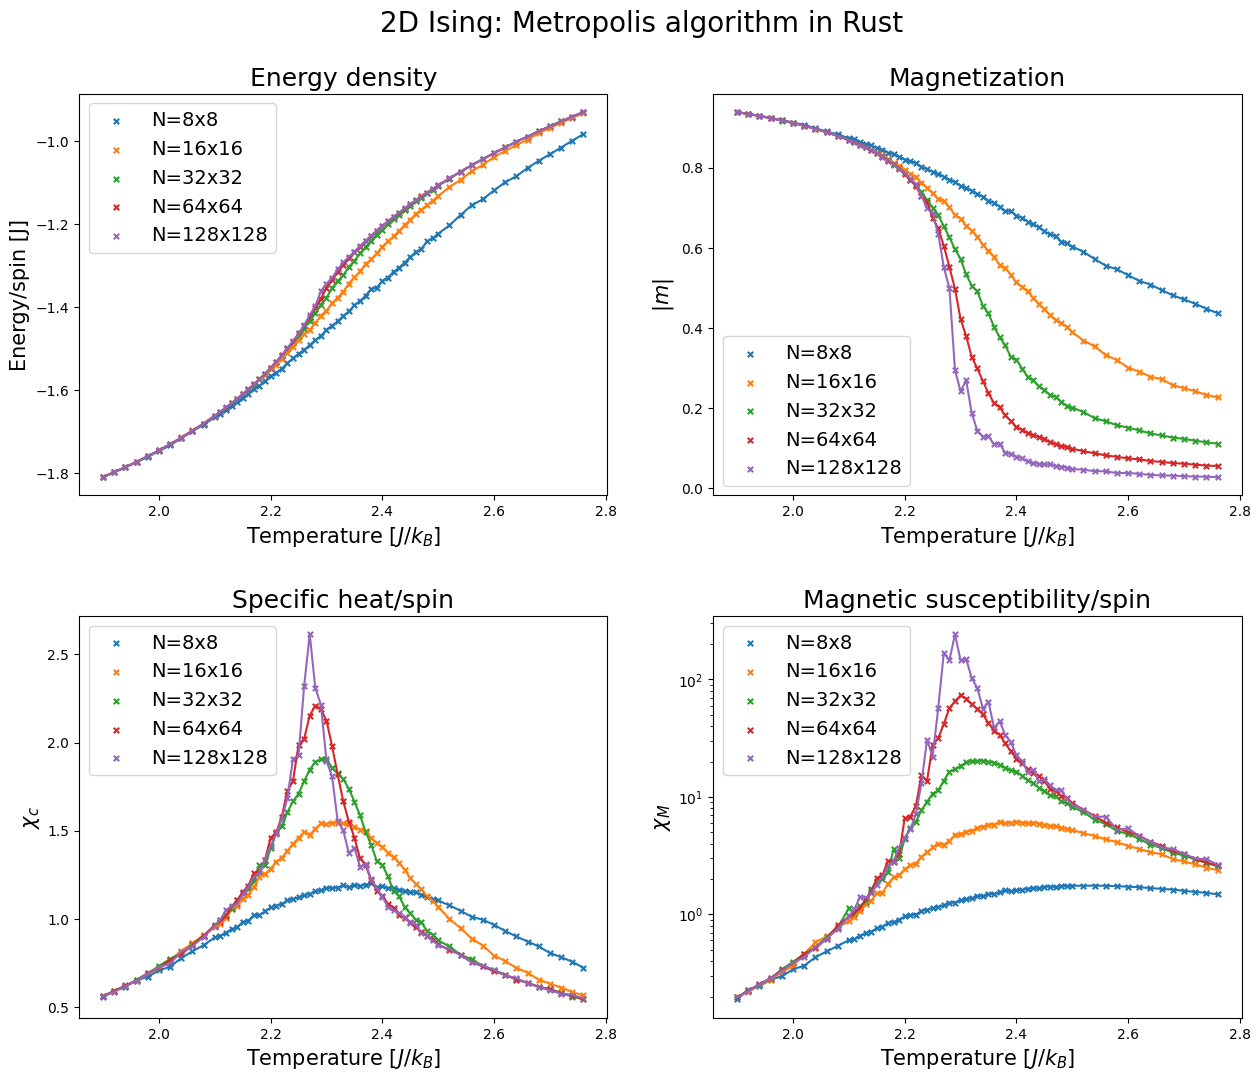

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,12))
# fig.tight_layout() 
plt.subplots_adjust(hspace=0.3)

fig.suptitle(f"2D Ising: Metropolis algorithm in Rust", y=0.95, fontsize=20)
for L in lengths:

    ax1.scatter(temps, results[L].energy_density, s=15, marker= 'x', label=f"N={L}x{L}")
    ax1.plot(temps, results[L].energy_density) 
    ax1.set_title(f"Energy density", fontsize=18)
    ax1.set_xlabel(r"Temperature [$J/k_B$]", fontsize=15)
    ax1.set_ylabel(r"Energy/spin [J]", fontsize=15)
    ax1.legend(loc="upper left", fontsize=14)

    ax2.scatter(temps, results[L].magnetisation, s=15, marker= 'x', label=f"N={L}x{L}")
    ax2.plot(temps, results[L].magnetisation)#, label="Rust")
    ax2.set_title(f"Magnetization", fontsize=18)
    ax2.legend(loc="lower left", fontsize=14)
    ax2.set_xlabel(r"Temperature [$J/k_B$]", fontsize=15)
    ax2.set_ylabel(r"$|m|$", fontsize=15)

    ax3.scatter(temps, results[L].specific_heat, s=15, marker= 'x', label=f"N={L}x{L}")
    ax3.plot(temps, results[L].specific_heat)#, label="Rust")
    ax3.set_title(f"Specific heat/spin", fontsize=18)
    ax3.legend(loc="upper left",fontsize=14)
    ax3.set_xlabel(r"Temperature [$J/k_B$]", fontsize=15)
    ax3.set_ylabel(r"$\chi_c$", fontsize=15)

    ax4.scatter(temps, results[L].mag_susceptibility, s=15, marker= 'x', label=f"N={L}x{L}")
    ax4.semilogy(temps, results[L].mag_susceptibility)
    ax4.set_title(f"Magnetic susceptibility/spin", fontsize=18)
    ax4.legend(loc="upper left",fontsize=14)
    ax4.set_xlabel(r"Temperature [$J/k_B$]", fontsize=15)
    ax4.set_ylabel(r"$\chi_M$", fontsize=15)
